In [84]:
#import libraries
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [85]:
#load files:-
train  = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Identify-Disaster-through-Twitter/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Identify-Disaster-through-Twitter/master/test.csv')
sample_sub=pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Identify-Disaster-through-Twitter/master/sample_submission.csv')

In [86]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [87]:
train.shape

(7613, 5)

In [88]:
train.info

<bound method DataFrame.info of          id keyword  ...                                               text target
0         1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1         4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2         5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3         6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4         7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
...     ...     ...  ...                                                ...    ...
7608  10869     NaN  ...  Two giant cranes holding a bridge collapse int...      1
7609  10870     NaN  ...  @aria_ahrary @TheTawniest The out of control w...      1
7610  10871     NaN  ...  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...      1
7611  10872     NaN  ...  Police investigating after an e-bike collided ...      1
7612  10873     NaN  ...  The Latest: More Homes Razed 

In [89]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [90]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [91]:
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [92]:
sample_sub

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [93]:
combi = train.append(test, ignore_index=True)

In [94]:
combi

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


In [95]:
combi.shape

(10876, 5)

In [96]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        10876 non-null  int64  
 1   keyword   10789 non-null  object 
 2   location  7238 non-null   object 
 3   text      10876 non-null  object 
 4   target    7613 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 425.0+ KB


In [97]:
combi.describe()

,id,target
count,10876.000000,7613.00000
mean,5437.500000,0.42966
std,3139.775098,0.49506
min,0.000000,0.00000
25%,2718.750000,0.00000
50%,5437.500000,0.00000
75%,8156.250000,1.00000
max,10875.000000,1.00000


In [98]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
location,2533,0.332720
keyword,61,0.008013
target,0,0.000000


In [99]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(3)

,Total,Percent
location,1105,0.338645
keyword,26,0.007968
text,0,0.000000


In [100]:
# substitue NaN value here with mode
combi['location'] = combi['location'].fillna(combi['location'].mode()[0])
combi['keyword'] = combi['keyword'].fillna(combi['keyword'].mode()[0])

In [101]:
combi

,id,keyword,location,text,target
0,1,ablaze,USA,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,ablaze,USA,Forest fire near La Ronge Sask. Canada,1.0
2,5,ablaze,USA,All residents asked to 'shelter in place' are ...,1.0
3,6,ablaze,USA,"13,000 people receive #wildfires evacuation or...",1.0
4,7,ablaze,USA,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
10871,10861,ablaze,USA,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
10872,10865,ablaze,USA,Storm in RI worse than last hurricane. My city...,NaN
10873,10868,ablaze,USA,Green Line derailment in Chicago http://t.co/U...,NaN
10874,10874,ablaze,USA,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


In [102]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser = HTMLParser()

In [103]:
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
combi['tidy_text'] = combi['text'].apply(lambda x: html_parser.unescape(x))
combi

,id,keyword,location,text,target,tidy_text
0,1,ablaze,USA,Our Deeds are the Reason of this #earthquake M...,1.0,Our Deeds are the Reason of this #earthquake M...
1,4,ablaze,USA,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near La Ronge Sask. Canada
2,5,ablaze,USA,All residents asked to 'shelter in place' are ...,1.0,All residents asked to 'shelter in place' are ...
3,6,ablaze,USA,"13,000 people receive #wildfires evacuation or...",1.0,"13,000 people receive #wildfires evacuation or..."
4,7,ablaze,USA,Just got sent this photo from Ruby #Alaska as ...,1.0,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...,...
10871,10861,ablaze,USA,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872,10865,ablaze,USA,Storm in RI worse than last hurricane. My city...,NaN,Storm in RI worse than last hurricane. My city...
10873,10868,ablaze,USA,Green Line derailment in Chicago http://t.co/U...,NaN,Green Line derailment in Chicago http://t.co/U...
10874,10874,ablaze,USA,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [104]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [105]:
# remove twitter handles (@user)
combi['tidy_text'] = np.vectorize(remove_pattern)(combi['text'], "@[\w]*")

In [106]:
#changing all tweets into lower case
combi['tidy_text'] = combi['tidy_text'].apply(lambda x: x.lower())
combi

,id,keyword,location,text,target,tidy_text
0,1,ablaze,USA,Our Deeds are the Reason of this #earthquake M...,1.0,our deeds are the reason of this #earthquake m...
1,4,ablaze,USA,Forest fire near La Ronge Sask. Canada,1.0,forest fire near la ronge sask. canada
2,5,ablaze,USA,All residents asked to 'shelter in place' are ...,1.0,all residents asked to 'shelter in place' are ...
3,6,ablaze,USA,"13,000 people receive #wildfires evacuation or...",1.0,"13,000 people receive #wildfires evacuation or..."
4,7,ablaze,USA,Just got sent this photo from Ruby #Alaska as ...,1.0,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,ablaze,USA,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake safety los angeles ûò safety faste...
10872,10865,ablaze,USA,Storm in RI worse than last hurricane. My city...,NaN,storm in ri worse than last hurricane. my city...
10873,10868,ablaze,USA,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment in chicago http://t.co/u...
10874,10874,ablaze,USA,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous weather outlook (hwo) htt...


In [107]:
# Apostrophe Dictionary
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
apostrophe_dict

{"'cause": 'because',
 "ain't": 'am not / are not',
 "aren't": 'are not / am not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had / he would',
 "he'd've": 'he would have',
 "he'll": 'he shall / he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he has / he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how has / how is',
 "i'd": 'I had / I would',
 "i'd've": 'I would have',
 "i'll": 'I shall / I will',
 "i'll've": 'I shall have / I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it will',
 "it'll've": 'it shall have / it will have',
 "it's": 'it has / it is',
 "let's": 'l

In [108]:
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

In [109]:
combi['tidy_text'] = combi['tidy_text'].apply(lambda x: lookup_dict(x,apostrophe_dict))
combi

,id,keyword,location,text,target,tidy_text
0,1,ablaze,USA,Our Deeds are the Reason of this #earthquake M...,1.0,our deeds are the reason of this #earthquake m...
1,4,ablaze,USA,Forest fire near La Ronge Sask. Canada,1.0,forest fire near la ronge sask. canada
2,5,ablaze,USA,All residents asked to 'shelter in place' are ...,1.0,all residents asked to 'shelter in place' are ...
3,6,ablaze,USA,"13,000 people receive #wildfires evacuation or...",1.0,"13,000 people receive #wildfires evacuation or..."
4,7,ablaze,USA,Just got sent this photo from Ruby #Alaska as ...,1.0,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,ablaze,USA,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake safety los angeles ûò safety faste...
10872,10865,ablaze,USA,Storm in RI worse than last hurricane. My city...,NaN,storm in ri worse than last hurricane. my city...
10873,10868,ablaze,USA,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment in chicago http://t.co/u...
10874,10874,ablaze,USA,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous weather outlook (hwo) htt...


In [110]:
short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [111]:
combi['tidy_text'] = combi['tidy_text'].apply(lambda x: lookup_dict(x,short_word_dict))
combi

,id,keyword,location,text,target,tidy_text
0,1,ablaze,USA,Our Deeds are the Reason of this #earthquake M...,1.0,our deeds are the reason of this #earthquake m...
1,4,ablaze,USA,Forest fire near La Ronge Sask. Canada,1.0,forest fire near la ronge sask. canada
2,5,ablaze,USA,All residents asked to 'shelter in place' are ...,1.0,all residents asked to 'shelter in place' are ...
3,6,ablaze,USA,"13,000 people receive #wildfires evacuation or...",1.0,"13,000 people receive #wildfires evacuation or..."
4,7,ablaze,USA,Just got sent this photo from Ruby #Alaska as ...,1.0,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,ablaze,USA,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake safety los angeles ûò safety faste...
10872,10865,ablaze,USA,Storm in RI worse than last hurricane. My city...,NaN,storm in ri worse than last hurricane. my city...
10873,10868,ablaze,USA,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment in chicago http://t.co/u...
10874,10874,ablaze,USA,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous weather outlook (hwo) htt...


In [112]:
emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}
emoticon_dict

{'8-)': 'happy',
 ':(': 'sad',
 ':)': 'happy',
 ':-(': 'sad',
 ':-3': 'happy',
 ':-< ': 'sad',
 ':->': 'happy',
 ':-[': 'sad',
 ':-]': 'happy',
 ':-c': 'sad',
 ':-||': 'sad',
 ':-}': 'happy',
 ':<': 'sad',
 ':[': 'sad',
 ':^)': 'happy',
 ':c': 'sad',
 ':c)': 'happy',
 ':o)': 'happy',
 ':{': 'sad',
 ':‑)': 'happy',
 '<3': 'happy',
 '=)': 'happy',
 '=]': 'happy',
 '>:(': 'sad',
 '>:[': 'sad'}

In [113]:
combi['tidy_text'] = combi['tidy_text'].apply(lambda x: lookup_dict(x,emoticon_dict))
combi

,id,keyword,location,text,target,tidy_text
0,1,ablaze,USA,Our Deeds are the Reason of this #earthquake M...,1.0,our deeds are the reason of this #earthquake m...
1,4,ablaze,USA,Forest fire near La Ronge Sask. Canada,1.0,forest fire near la ronge sask. canada
2,5,ablaze,USA,All residents asked to 'shelter in place' are ...,1.0,all residents asked to 'shelter in place' are ...
3,6,ablaze,USA,"13,000 people receive #wildfires evacuation or...",1.0,"13,000 people receive #wildfires evacuation or..."
4,7,ablaze,USA,Just got sent this photo from Ruby #Alaska as ...,1.0,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,ablaze,USA,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake safety los angeles ûò safety faste...
10872,10865,ablaze,USA,Storm in RI worse than last hurricane. My city...,NaN,storm in ri worse than last hurricane. my city...
10873,10868,ablaze,USA,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment in chicago http://t.co/u...
10874,10874,ablaze,USA,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous weather outlook (hwo) htt...


In [114]:
#disaster word dictionaty
disaster_dict = {
"ablaze": "ablaze disaster",
"accident": "accident disaster",
"accidents": "accidents disaster",
"aftershock": "aftershock disaster",
"ambulance": "ambulance disaster",
"ambulances": "ambulances disaster",
"annihilate": "annihilate disaster",
"annihilated": "annihilated disaster",
"annihilates": "annihilates disaster",
"annihilation": "annihilation disaster",
"apocalypse": "apocalypse disaster",
"armies": "armies disaster",
"army": "army disaster",
"armageddon": "armageddon disaster",
"arson": "arson disaster",
"arsonist": "arsonist disaster",
"attack": "attack disaster",
"attacked": "attacked disaster",
"attacks": "attacks disaster",
"avalanche": "avalanche disaster",
"bang": "bang disaster",
"battle": "battle disaster",
"bioterror": "bioterror disaster",
"bioterrorism": "bioterrorism disaster",
"bioterrorist": "bioterrorist disaster",
"blaze": "blaze disaster",
"blazed": "blazed disaster",
"blazen": "blazen disaster",
"blazes": "blazes disaster",
"blazing": "blazing disaster",
"bleed": "bleed disaster",
"bleeding": "bleeding disaster",
"blight": "blight disaster",
"blighted": "blighted disaster",
"blighting": "blighting disaster",
"blights": "blights disaster",
"blizzard": "blizzard disaster",
"blizzards": "blizzards disaster",
"blood": "blood disaster",
"bloody": "bloody disaster",
"bodybag": "bodybag disaster",
"bodybags": "bodybags disaster",
"bomb": "bomb disaster",
"bomber": "bomber disaster",
"bombing": "bombing disaster",
"bombs": "bombs disaster",
"burn": "burn disaster",
"burned": "burned disaster",
"burning": "burning disaster",
"burns": "burns disaster",
"burnt": "burnt disaster",
"casualties": "casualties disaster",
"casualty": "casualty disaster",
"catastrophe": "catastrophe disaster",
"catastrophic": "catastrophic disaster",
"chemical": "chemical disaster",
"chemicals": "chemicals disaster",
"cliff": "cliff disaster",
"cliffhanger": "cliffhanger disaster",
"cliffs": "cliffs disaster",
"collapse": "collapse disaster",
"collapsed": "collapsed disaster",
"collide": "collide disaster",
"collided": "collided disaster",
"collision": "collision disaster",
"crash": "crash disaster",
"crashed": "crashed disaster",
"crush": "crush disaster",
"crushed": "crushed disaster",
"curfew": "curfew disaster",
"cyclone": "cyclone disaster",
"danger": "danger disaster",
"dangerous": "dangerous disaster",
"dangerzone": "dangerzone disaster",
"dead": "dead disaster",
"death": "death disaster",
"demolish": "demolish disaster",
"demolished": "demolishes disaster",
"demolishes": "demolishes disaster",
"demolishing": "demolishing disaster",
"died": "died disaster",
"debris":  "debris disaster",
"derail": "derail disaster",
"derailed": "derailed disaster",
"destroy": "destroy disaster",
"destroyed": "destroyed disaster",
"destroying": "destroying disaster",
"destroys": "destroys disaster",
"derailment": "derailment disaster",
"detonate": "detonate disaster",
"detonated": "detonated disaster",
"detonates": "detonates disaster",
"detonating": "detonating disaster",
"detonation": "detonation disaster",
"devastated": "devastated disaster",
"devastation": "devastation disaster",
"damage": "damage disaster",
"damaged": "damaged disaster",
"damages": "damages disaster",
"deluge": "deluge disaster",
"deluged": "deluged disaster",
"demolish": "demolish disaster",
"demolished": "demolished disaster",
"demolition": "demolition disaster",
"desolate": "desolate disaster",
"destruction": "destruction disaster",
"disaster": "disaster disaster",
"disasters": "disasters disaster",
"displace": "displace disaster",
"displaced": "displaced disaster",
"drought": "drought disaster",
"drown": "drown disaster",
"drowned": "drowned disaster",
"drowning": "drowning disaster",
"drowns": "drowns disaster",
"earthquake": "earthquake disaster",
"earthquakes": "earthquake disaster",
"electrocute": "electrocute disaster",
"electrocuted": "electrocuted disaster",
"electrocutes": "electrocutes disaster",
"electrocuting": "electrocuting disaster",
"emergency": "emergency disaster",
"emergencies": "emergencies disaster",
"engulf": "engulf disaster",
"engulfed": "engulfed disaster",
"engulfing": "engulfing disaster",
"evacuate": "evacuate disaster",
"evacuated": "evacuated disaster",
"explode": "explode disaster",
"exploded": "exploded disaster",
"explodes": "explodes disaster",
"exploding": "exploding disaster",
"explosion": "explosion disaster",
"eyewitness": "eyewitness disaster",
"eyewitnesses": "eyewitnesses disaster",
"eyewitnessed": "eyewitnessed disaster",
"fail": "fail disaster",
"failed": "failed disaster",
"failure": "failure disaster",
"fall": "fall disaster",
"falling": "falling disaster",
"famine": "famine disaster",
"fatal": "fatal disaster",
"fatalities": "fatalities disaster",
"fatality": "fatality disaster",
"fear": "fear disaster",
"feared": "feared disaster",
"fearful": "fearful disaster",
"fears": "fears disaster",
"fearsome": "fearsome disaster",
"fell": "fell disaster",
"fire": "fire disaster",
"fires": "fires disaster",
"flame": "flame disaster",
"flames": "flames disaster",
"flaming": "flaming disaster",
"flood": "flood disaster",
"flooded": "flooded disaster",
"flooding": "flooding disaster",
"floods": "floods disaster",
"hail": "hail disaster",
"hailed": "hailed disaster",
"hailing": "hailing disaster",
"hails": "hails disaster",
"hailstorm": "hailstorm disaster",
"hailstormed": "hailstormed disaster",
"hailstorming": "hailstorming disaster",
"hailstorms": "hailstorms disaster",
"harm": "harm disaster",
"harmed": "harmed disaster",
"harming": "harming disaster",
"harms": "harms disaster",
"hazard": "hazard disaster",
"hazardous": "hazardous disaster",
"heatwave": "heatwave disaster",
"hell": "hell disaster",
"hellfire": "hellfire disaster",
"hijack": "hijack disaster",
"hijacked": "hijacked disaster",
"hijacker": "hijacker disaster",
"hijacking": "hijacking disaster",
"hostage": "hostage disaster",
"hostages": "hostages disaster",
"hurricane": "hurricane disaster",
"hurricanes": "hurricanes disaster",
"injure": "injure disaster",
"injured": "injured disaster",
"injures": "injures disaster",
"injuries": "injuries disaster",
"injuring": "injuring disaster",
"injury": "injury disaster",
"inundate": "inundate disaster",
"inundated": "inundated disaster",
"inundation": "inundation disaster",
"landslide": "landslide disaster",
"landslides": "landslides disaster",
"lava": "lava disaster",
"lightning": "lightning disaster",
"massacre": "massacre disaster",
"massacred": "massacred disaster",
"massacres": "massacres disaster",
"mayhem": "mayhem disaster",
"meltdown": "meltdown disaster",
"meltdowns": "meltdowns disaster",
"military": "military disaster",
"militarise": "militarise disaster",
"militarize": "militarize disaster",
"mudslide": "mudslide disaster",
"mudslides": "mudslides disaster",
"murder": "murder disaster",
"murdered": "murdered disaster",
"murderer": "murderer disaster",
"murderers": "murderers disaster",
"murders": "murders disaster",
"nuclear": "nuclear disaster",
"obliterate": "obliterate disaster",
"obliterated": "obliterated disaster",
"obliterates": "obliterates disaster",
"obliterating": "obliterating disaster",
"obliteration": "obliteration disaster",
"outbreak": "outbreak disaster",
"pandemonium": "pandemonium disaster",
"panic": "panic disaster",
"panicked": "panicked disaster",
"panicking": "panicking disaster",
"panics": "panics disaster",
"police": "police disaster",
"policeman": "policeman disaster",
"policemen": "policemen disaster",
"rainstorm": "rainstorm disaster",
"quarantine": "quarantine disaster",
"quarantined": "quarantined disaster",
"quarantines": "quarantines disaster",
"quarantining": "quarantining disaster",
"rainstormed": "rainstormed disaster",
"rainstorming": "rainstorming disaster",
"rainstorms": "rainstorms disaster",
"radiation": "radiation disaster",
"raze": "raze disaster",
"razed": "razed disaster",
"reactor": "reactor disaster",
"reactors": "reactors disaster",
"refugee": "refugee disaster",
"refugees": "refugees disaster",
"rescue": "rescue disaster",
"rescued": "rescued disaster",
"rescuer": "rescuer disaster",
"rescuing": "rescuing disaster",
"responder": "responder disaster",
"responders": "responders disaster",
"riot": "riot disaster",
"rioted": "rioted disaster",
"rioting": "rioting disaster",
"riots": "riots disaster",
"rubble": "rubble disaster",
"ruin": "ruin disaster",
"ruined": "ruined disaster",
"ruining": "ruining disaster",
"ruins": "ruins disaster",
"scream": "scream disaster",
"screamed": "screamed disaster",
"screaming": "screaming disaster",
"screams": "screams disaster",
"seismic": "seismic disaster",
"sank": "sank disaster",
"sink": "sink disaster",
"sinking": "sinking disaster",
"sunk": "sunk disaster",
"sinkhole": "sinkhole disaster",
"sinkholes": "sinkholes disaster",
"siren": "siren disaster",
"sirens": "sirens disaster",
"smoke": "smoke disaster",
"smoked": "smoked disaster",
"smoking": "smoking disaster",
"smokes": "smokes disaster",
"snow": "snow disaster",
"snowed": "snowed disaster",
"snowing": "snowing disaster",
"snows": "snows disaster",
"snowstorm": "snowstorm disaster",
"snowstormed": "snowstormed disaster",
"snowstorming": "snowstorming disaster",
"snowstorms": "snowstorms disaster",
"spill": "spill disaster",
"starvation": "starvation disaster",
"starve": "starve disaster",
"storm": "storm disaster",
"stormed": "stormed disaster",
"storming": "storming disaster",
"storms": "storms disaster",
"stretcher": "stretcher disaster",
"suicide": "suicide disaster",
"survive": "survive disaster",
"survived": "survived disaster",
"survives": "survives disaster",
"surviving": "surviving disaster",
"survivor": "survivor disaster",
"survivors": "survivors disaster",
"terror": "terror disaster",
"terrorism": "terrorism disaster",
"terrorist": "terrorist disaster",
"threat": "threat disaster",
"threaten": "threaten disaster",
"thunder": "thunder disaster",
"thundered": "thundered disaster",
"thundering": "thundering disaster",
"thunders": "thunders disaster",
"thunderstorm": "thunderstorm disaster",
"thunderstormed": "thunderstormed disaster",
"thunderstorming": "thunderstorming disaster",
"thunderstorms": "thunderstorms disaster",
"tornado": "tornado disaster",
"tornados": "tornados disaster",
"tragic": "tragic disaster",
"tragedy": "tragedy disaster",
"trap": "trap disaster",
"trapped": "trapped disaster",
"trapping": "trapping disaster",
"traps": "traps disaster",
"trauma": "trauma disaster",
"traumatise": "traumatise disaster",
"traumatised": "traumatised disaster",
"traumatises": "traumatises disaster",
"traumatising": "traumatising disaster",
"traumatize": "traumatize disaster",
"traumatized": "traumatized disaster",
"traumatizing": "traumatizing disaster",
"traumatizes": "traumatizes disaster",
"trouble": "trouble disaster",
"troubles": "troubles disaster",
"tsunami": "tsunami disaster",
"tsunamis": "tsunamis disaster",
"twister": "twister disaster",
"twisters": "twisters disaster",
"typhoon": "typhoon disaster",
"upheaval": "upheaval disaster",
"violence": "violence disaster",
"violent": "violent disaster",
"volcanic": "volcanic disaster",
"volcano": "volcano disaster",
"war": "war disaster",
"warred": "warred disaster",
"warring": "warring disaster",
"wars": "wars disaster",
"weapon": "weapon disaster",
"weaponize": "weaponize disaster",
"weaponise": "weaponise disaster",
"weapons": "weapons disaster",
"whirlwind": "whirlwind disaster",
"wildfire": "wildfire disaster",
"wildfires": "wildfires disaster",
"windstorm": "windstorm disaster",
"windstormed": "windstormed disaster",
"windstorming": "windstorming disaster",
"windstorms": "windstorms disaster",
"wound": "wound disaster",
"wounded": "wounded disaster",
"wounding": "wounding disaster",
"wounds": "wounds disaster",
"wreck": "wreck disaster",
"wreckage": "wreckage disaster",
"wrecked": "wrecked disaster",
}

In [115]:
combi['tidy_text'] = combi['tidy_text'].apply(lambda x: lookup_dict(x,disaster_dict))
combi

,id,keyword,location,text,target,tidy_text
0,1,ablaze,USA,Our Deeds are the Reason of this #earthquake M...,1.0,our deeds are the reason of this #earthquake m...
1,4,ablaze,USA,Forest fire near La Ronge Sask. Canada,1.0,forest fire disaster near la ronge sask. canada
2,5,ablaze,USA,All residents asked to 'shelter in place' are ...,1.0,all residents asked to 'shelter in place' are ...
3,6,ablaze,USA,"13,000 people receive #wildfires evacuation or...",1.0,"13,000 people receive #wildfires evacuation or..."
4,7,ablaze,USA,Just got sent this photo from Ruby #Alaska as ...,1.0,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,ablaze,USA,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake disaster safety los angeles ûò saf...
10872,10865,ablaze,USA,Storm in RI worse than last hurricane. My city...,NaN,storm disaster in ri worse than last hurricane...
10873,10868,ablaze,USA,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment disaster in chicago http...
10874,10874,ablaze,USA,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous disaster weather outlook ...


In [116]:
# remove special characters, numbers, punctuations
combi['tidy_text'] = combi['tidy_text'].str.replace("[^a-zA-Z#]", " ")
combi

,id,keyword,location,text,target,tidy_text
0,1,ablaze,USA,Our Deeds are the Reason of this #earthquake M...,1.0,our deeds are the reason of this #earthquake m...
1,4,ablaze,USA,Forest fire near La Ronge Sask. Canada,1.0,forest fire disaster near la ronge sask canada
2,5,ablaze,USA,All residents asked to 'shelter in place' are ...,1.0,all residents asked to shelter in place are ...
3,6,ablaze,USA,"13,000 people receive #wildfires evacuation or...",1.0,people receive #wildfires evacuation or...
4,7,ablaze,USA,Just got sent this photo from Ruby #Alaska as ...,1.0,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,ablaze,USA,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake disaster safety los angeles saf...
10872,10865,ablaze,USA,Storm in RI worse than last hurricane. My city...,NaN,storm disaster in ri worse than last hurricane...
10873,10868,ablaze,USA,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment disaster in chicago http...
10874,10874,ablaze,USA,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous disaster weather outlook ...


In [117]:
#remove words with length of 3 or less
combi['tidy_text'] = combi['tidy_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi['tidy_text']


0              deeds reason this #earthquake allah forgive
1              forest fire disaster near ronge sask canada
2        residents asked shelter place being notified o...
3        people receive #wildfires evacuation orders ca...
4        just sent this photo from ruby #alaska smoke d...
                               ...                        
10871    earthquake disaster safety angeles safety fast...
10872    storm disaster worse than last hurricane city ...
10873    green line derailment disaster chicago http ut...
10874    issues hazardous disaster weather outlook http...
10875    #cityofcalgary activated municipal emergency d...
Name: tidy_text, Length: 10876, dtype: object

In [118]:
#spelling correction with text blob library
#combi['tidy_text'] = combi['tidy_text'].apply(lambda x: str(TextBlob(x).correct()))
#combi

In [119]:
tokenized_tweet = combi['tidy_text'].apply(lambda x: x.split())
tokenized_tweet

0        [deeds, reason, this, #earthquake, allah, forg...
1        [forest, fire, disaster, near, ronge, sask, ca...
2        [residents, asked, shelter, place, being, noti...
3        [people, receive, #wildfires, evacuation, orde...
4        [just, sent, this, photo, from, ruby, #alaska,...
                               ...                        
10871    [earthquake, disaster, safety, angeles, safety...
10872    [storm, disaster, worse, than, last, hurricane...
10873    [green, line, derailment, disaster, chicago, h...
10874    [issues, hazardous, disaster, weather, outlook...
10875    [#cityofcalgary, activated, municipal, emergen...
Name: tidy_text, Length: 10876, dtype: object

In [120]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet

0           [deed, reason, thi, #earthquak, allah, forgiv]
1         [forest, fire, disast, near, rong, sask, canada]
2        [resid, ask, shelter, place, be, notifi, offic...
3        [peopl, receiv, #wildfir, evacu, order, califo...
4        [just, sent, thi, photo, from, rubi, #alaska, ...
                               ...                        
10871    [earthquak, disast, safeti, angel, safeti, fas...
10872    [storm, disast, wors, than, last, hurrican, ci...
10873    [green, line, derail, disast, chicago, http, u...
10874    [issu, hazard, disast, weather, outlook, http,...
10875    [#cityofcalgari, activ, municip, emerg, disast...
Name: tidy_text, Length: 10876, dtype: object

In [121]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_text'] = tokenized_tweet

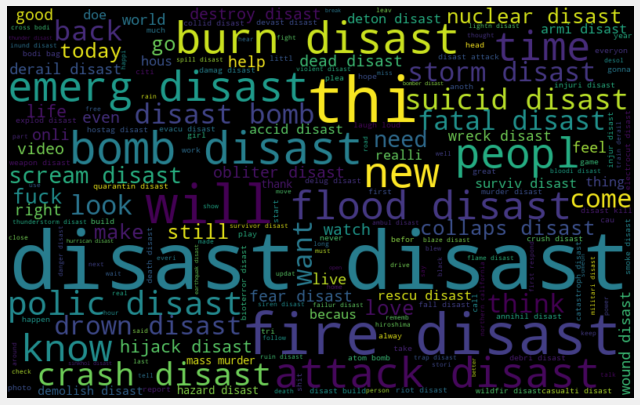

In [122]:
all_words = ' '.join([text for text in combi['tidy_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

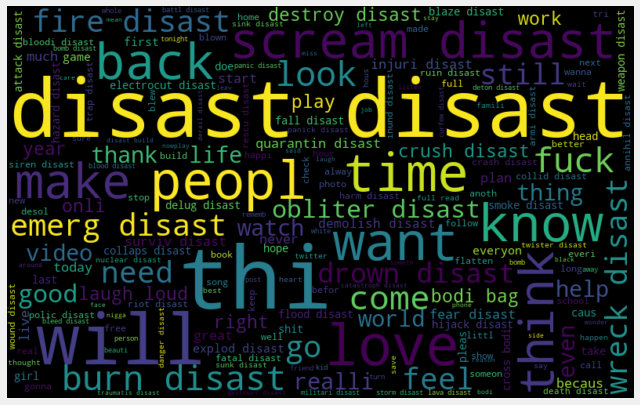

In [123]:
normal_words =' '.join([text for text in combi['tidy_text'][combi['target'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

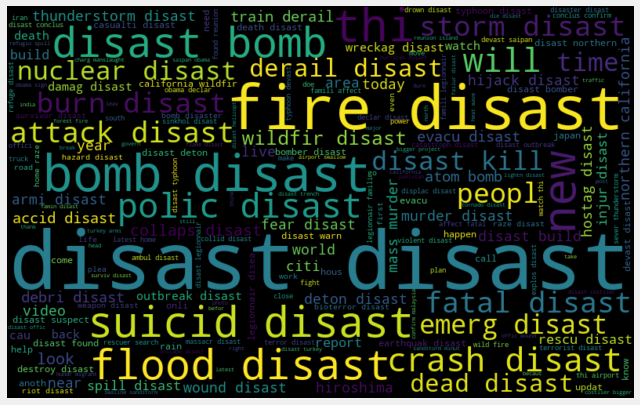

In [124]:
negative_words = ' '.join([text for text in combi['tidy_text'][combi['target'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [125]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [126]:
# extracting hashtags from normal tweets
HT_regular = hashtag_extract(combi['tidy_text'][combi['target'] == 0])
# extracting hashtags from negative tweets
HT_negative = hashtag_extract(combi['tidy_text'][combi['target'] == 1])
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

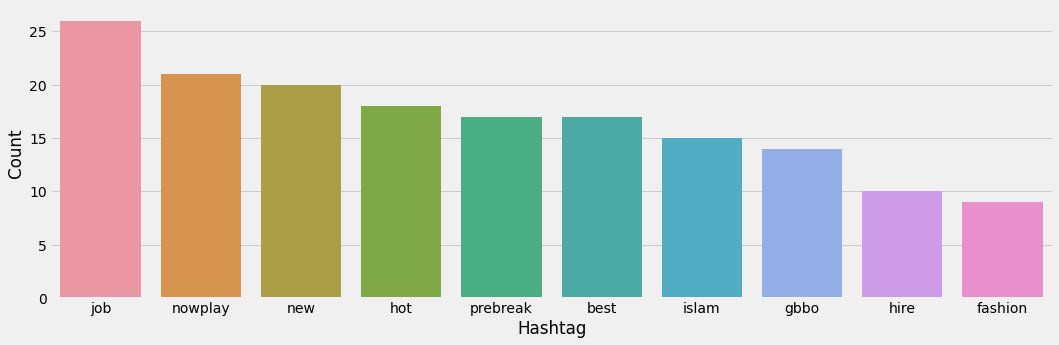

In [127]:
#positive tweets
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

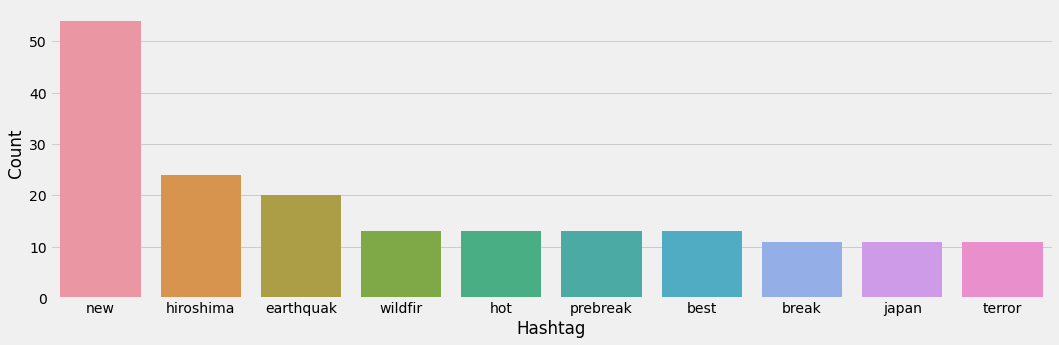

In [128]:
#negative tweets
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_text'])

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_text'])

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
train_bow = bow[:7613,:]
test_bow = bow[7613:,:]
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['target'], random_state=42, test_size=0.3)
#create logistic regression
lreg = LogisticRegression()
#create hyper parameters
penalty=['l1', 'l2']
C=np.logspace(0,4,10)
hyperparameters=dict(C=C, penalty=penalty)
#create grid search
clf=GridSearchCV(lreg, hyperparameters, cv=5, verbose=0)
#fit the model
best_model=clf.fit(xtrain_bow, ytrain) # training the model
#view best parameters
print('best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('best C:', best_model.best_estimator_.get_params()['C'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

best penalty: l2
best C: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [132]:
best_model.predict(test_bow)
best_model

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
            

In [133]:
prediction = clf.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int) # calculating f1 score

0.7320858055682335

In [134]:
test_pred = clf.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file
submission

,id,label
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [135]:
train_tfidf = tfidf[:7613,:]
test_tfidf = tfidf[7713:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = clf.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.7196367763904653